# Relevance between movies based on their subtitles
The intention in this notebook  use movie subtitles to make recommendations based on a semantic relevance check.

Relevant Sources:
   * [Parts of speech](https://www.englishclub.com/grammar/)
   * [Tf-Idf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
   * [Using latent semantic analysis](http://stackoverflow.com/questions/18997905/use-latent-semantic-analysis-with-sklearn#18999170)
   * [Dictionary module used for checking a word membership to the english language](http://pythonhosted.org/pyenchant/)
   * [Base for the plotting function](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [37]:
from collections import Counter, OrderedDict
from matplotlib import figure
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

import enchant
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

For this purpose we need to define two functions, one that 'cleans' the subtitles and one that calculates the relevance between the moovies. First we define the cleaning function.

In [18]:
def clean_subtitle(subtitle_file, dictionary_check = False):
    with open(subtitle_file, 'r') as subtitle_text:
        subtitle_text= subtitle_text.read().replace('\n', ' ')
    subtitle_text= subtitle_text.lower()
    
    with open('DisposableWordsSR', 'r') as words:
        disposable_w= words.read().replace('\n', '')
    other_spacial_values = '\w|\d|re|do|not|don|ll|is|are|ve|am|was|were|aren|au|de|didn|ida|doed|doesn|wh|whoo|whooee|whooe|whoooo|wow|wxbx|yo|ya|ma|may|maybe|m|mm|mmm|mon|nada|ogo|lo|ja|isn|im|ill|hoo|ohh|ooh|who|doin|else|emu|end|shh|aah|agh|al|also|mrs|mr|will|did|do|yeah|have|does|ch|la|yes|no|ha|ho|ow|em|ahh|ain|be|can|int|'
    re_str = r'\b([\d]+|\:|,)\b|[\<][\d\s\w\+\:\?\®\©\-\/\#\=\"]+[\>]|[->]+|[\.\®\©]+|[\{\(\[]+[\s\w]*[\]\)\}]+|[\[\]\(\)\{\}]+|(\b(' + other_spacial_values + disposable_w + r')\b)'
    regex_filter = re.compile(re_str)
    
    subtitle_text = regex_filter.sub(repl='', string=subtitle_text)
    for i in [',', '.', '?', '...', '!', '"', '\'', '/', '#', ':', ';', '&', '%', '$', '*', '—']:
        subtitle_text= subtitle_text.replace(i, ' ')
    if dictionary_check == True:
        d = enchant.Dict("en_US")
        clean_subtitle = ''
        for i in subtitle_text.split():
            if d.check(i) == True:
                clean_subtitle += '{} '.format(i)
        return clean_subtitle
    return subtitle_text

Function comments

In [57]:
def texts_relevance(texts):
    vect = TfidfVectorizer(max_df=0.5)
    tfidf, lsa = vect.fit_transform(texts), TruncatedSVD()
    #tfidf = lsa.fit_transform(tfidf)
    #tfidf = cosine_similarity(tfidf)
    tfidf = Normalizer(copy=False).fit_transform(tfidf)
    return (tfidf * tfidf.T).A

Function comments

In [55]:
def subtitle_histogram(text, title='', number_of_words=50, display_word_count=True, sort_by_word_count=True, increasing=False):
    if display_word_count == True:
        print('Words Title')
        print('{} {}'.format(len(set(text.split())), title))
    labels, y = zip(*sorted(Counter(text.split()).items(), key=lambda p:p[sort_by_word_count], reverse=not(increasing)))
    x, width = np.arange(number_of_words), 0.3
    plt.figure(figsize=(18, 5))
    plt.suptitle(title)
    plt.bar(x[0:number_of_words], y[0:number_of_words], width)
    plt.xticks(x, labels, rotation='vertical')
    plt.show()


Function comments

In [51]:
def plot_confusion_matrix(subtitles_data, movies_names, title='Relevance between movies', cmap=plt.cm.Accent):
    plt.figure(figsize=(len(movies_names), len(movies_names)), dpi=150)
    plt.imshow(subtitles_data, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.clim(1.0,0.0)
    plt.colorbar()
    tick_marks = np.arange(len(movies_names))
    plt.xticks(tick_marks, movies_names, rotation='vertical')
    plt.yticks(tick_marks, movies_names)
    thresh = subtitles_data.max() / 2.0
    for i, j in itertools.product(range(subtitles_data.shape[0]), range(subtitles_data.shape[1])):
        plt.text(j, i, '{:.3f}'.format(subtitles_data[i, j]),
                 horizontalalignment="center",
                 color="white" if subtitles_data[i, j] > thresh else "black")
    plt.show()

In [59]:
def obtain_subtitle_data(subtitles_path, file_extension='srt'):
    files = sorted([file for file in subtitles_path if file[-4:] == '.' + file_extension])
    name_data = []
    for i in files:
        name_data.append((i[:-4], clean_subtitle(i)))
    return name_data

##  Implentation
In this section we are going to use the functions defined above to achieve our task.

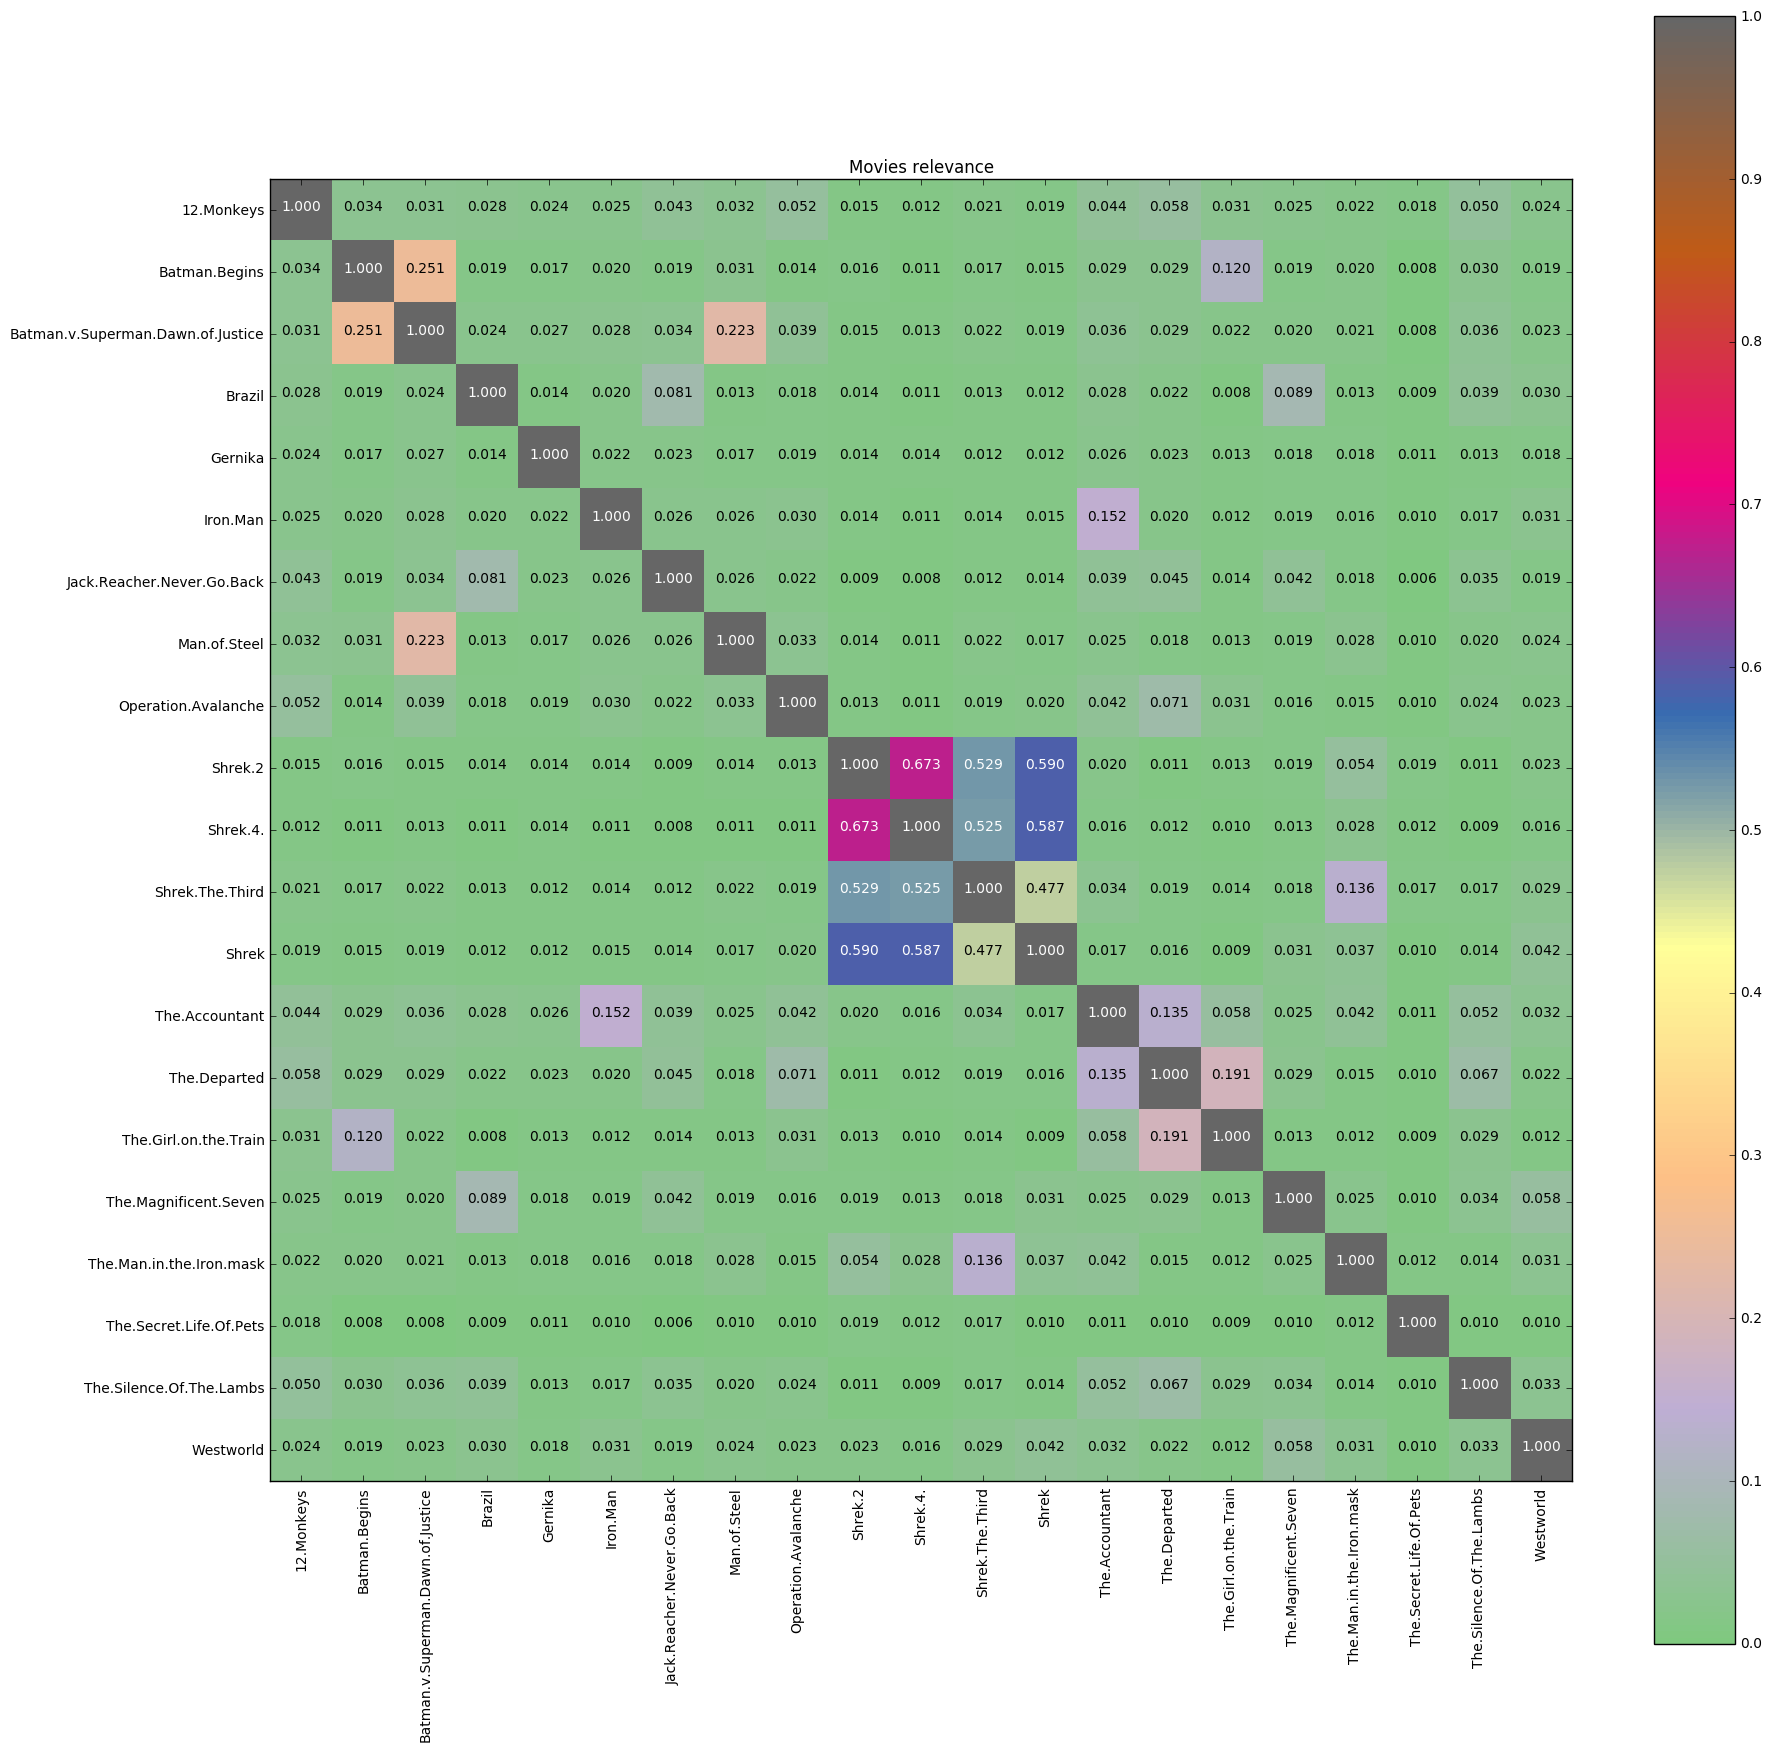

In [60]:
name_data = obtain_subtitle_data(os.listdir(os.getcwd()))
movies_names, subtitles_data = zip(*name_data)
plot_confusion_matrix(texts_relevance(subtitles_data), movies_names,title='Movies relevance')

Words Title
1835 12.Monkeys


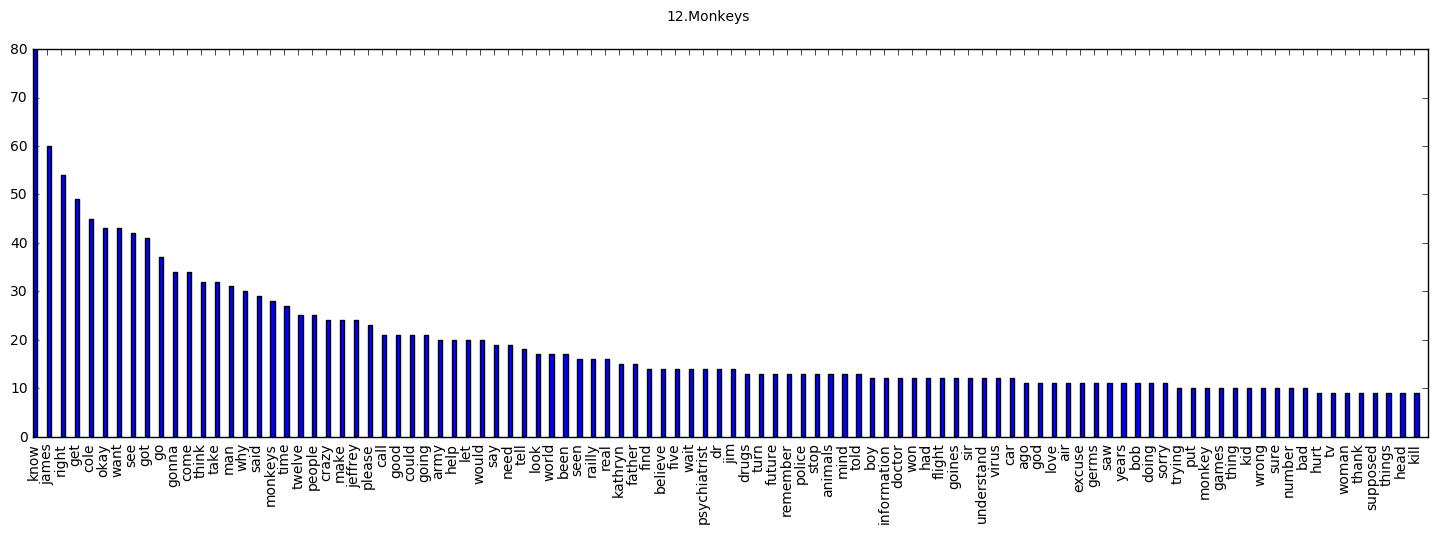

In [61]:
subtitle_histogram(name_data[0][1], title=name_data[0][0], display_word_count=True, number_of_words=100)